### <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393/578 Máquinas de Aprendizaje - 2019-1 </h1>

<H3 align='center'> Tarea 3  </H3>
<hr style="height:2px;border:none"/>

<H3 align='center'> Camilo Maldonado - 201573013-K </H3>
<H3 align='center'> Diego Córdova - 201403009-6 </H3>

**Temas**  
* Manipulaciones en numpy
* Arboles de clasificación y regresión
* Algunas Redes neuronales básicas
* Ensamblados, Adaboost y Random Forest
* Nociones de clases desbalanceadas


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio *privado* en _Github_, al correo electrónico del ayudante (*<alvaro.valderrama.13@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF393/578-2019 Tarea 3]. Invitar como colaborador al usuario de github "avalderr" para poder acceder al repositorio.
* Fecha de entrega y presentaciones: 13 de Septiembre. Hora límite de entrega: 23:50. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) Regresión para ubicación espacial  
[2.](#segundo) Clasificación con clases desbalanceadas    
[3.](#tercero) Clasificación en texto   

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_ por ejemplo.

<a id="tercero"></a>
## 3. Clasificación en texto

Un problema muy complejo, en el cual actualmente se esta avanzando a pasos de gigantes en comparación con los avances de hace unos cuantos años, es en la comprehensión de texto, o de lenguaje natural en general. Nuestra manera de construir significado a partir de las palabras es mucho más compleja de lo que nos damos cuenta y supone un gran grado de conocimiento previo que hemos adquirido a lo largo de nuestras vidas. Lograr que una maquina de aprendizaje pueda extraer significado o interpretaciones a partir de un texto es un problema bastante actual, en el cual aún se hacen avances día a día. En esta pregunta utilizaremos una base de datos de texto, extraida de _reviews_ de peliculas en la página IMDB. Cada uno de estos _reviews_ esta etiquetado como positivo o negativo. Nuestra tarea será predecir esta etiqueta a partir de la secuencia de palabras encodeadas como frecuencias de cada ejemplo.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/New-imdb-logo.png/1024px-New-imdb-logo.png"  style="height:6cm;"  />

Para esto probaremos distintas técnicas, incluyendo Perceptron, Redes densas _feed forward_ y ensamblados. Si bien ninguna de estas aproximaciones son las usualmente utilizadas en la actualidad para procesamiento de texto (_words embeddings_, redes recurrentes y redes convolucionales, entre muchos otros), esta pregunta servirá como una buena aproximación a las problematicas usualmente encontradas en estas técnicas y al momento de trabajar con texto. 


#### 3.a Carga de datos y preprocesamientos

Cargue los datos. Utilizaremos 45000 de los datos como entrenamiento y el resto como validación. Investigue sobre la base de datos en cuestión y la representación de los datos cargados: ¿qué representa cada entrada de `x_tr`?

Comente ligeramente sobre los parámetros `num_words` y `skip_top`. ¿Por qué podría ser deseable eliminar las palabras más comunes?

Utilize luego la función `vectorize_sequences` para transformar los inputs del modelo. ¿Qué realiza esta función? ¿Qué valor debería tener el parámetro `dimension` en este caso?  ¿Qué información perdemos y qué información preservamos en esta transformación?

In [0]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier

##### Dataset IMBD
* 25.000 *review* sobre películas etiquetada con positiva o negativa
* Los datos vienen codificados a una secuencia de índices, los cuales corresponden al i-ésima palabra más frecuente, ejemplo 5 es para la quinta más usada. Las frecuencias son sobre todo el dataset. Esto ayuda a limpiar rápidamente palabras muy usadas o muy raras/mal escritas. Por último, el 0 sirve para palabras desconocidas. 

##### Consideraciones
* **skip_top=n** omite las n primeras palabras más frecuentes, debido a que si son tan usadas no entrega información relevante por cada película, por ejemplo: si se describe el *director*, no importa mucho la palabra *director* ya que todas tendrán, pero si el nombre que le sigue por delante. 
* **num_words=n** sirve para indicar cuales serán las n primeras palabras a considerarse dentro del *diccionario* y el resto será arrojado a 0.
* La data es una lista de secuencias con los índices antes descritos, que además se puede poner un máximo del largo, debido a que al ser textos la cantidad de palabras es muy variable.

#### Transformación
Como es un vector con valores discretizados al ponerlo en la red aparecerán valores flotantes que no tendrían sentido, por ende se pasa a otra representación. Cada review pasa a ser un arreglo del largo del diccionario donde tiene un 0 en las palabras que no aparecen y un 1 en las que aparece, con esto generamos una interpretación en forma de probabilidades pero a la vez se pierde la frecuencia con que cada palabra puede aparecer en un mismo review y se le da igual importancia a todas las palabras, es decir no hace diferencia entre si es un adjetivo, nombre o título de algo.

In [0]:


num_words = 500
(x_tr, y_tr), (x_val, y_val) = imdb.load_data(num_words=num_words, skip_top=5)

def vectorize_sequences(sequences, dimension=1):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
    return results

x_tr = vectorize_sequences(x_tr,num_words)
x_val = vectorize_sequences(x_val,num_words)

17465344/17464789 [==============================] - 0s 0us/step


#### 3.b Perceptrón **(Opcional)**
Entrene un perceptrón con activación sigmoidea, optimizador _Stochastic Gradient Descent_, por a lo menos 15 _epochs_, como muestra el código siguiente. 

Discuta sobre la dimensión de `x_tr` y la cantidad de parámetros del modelo deacuerdo al método `.summary` del modelo. 

Grafique el error o el _accuracy_ segun su preferencia, tanto sobre entrenamiento como validación, a medida pasan los _epochs_. Note esta información puede obtenerla desde `history.history`.

##### Descripción
Al ser un perceptrón tiene un peso por cada característica, que en este caso es el vector d elargo 500 que contiene 1 o 0 de acuerdo a la presencia de las palabras. A eso se le suma el bias, dando un modelo de 501 parámetros.

In [0]:
per = Sequential()
per.add(Dense(1,activation='sigmoid'))
per.compile('sgd',loss='binary_crossentropy',metrics=['accuracy'])
history = per.fit(x_tr,y_tr, epochs=30, validation_data=(x_val,y_val))
per.summary()

Train on 25000 samples, validate on 25000 samples
Epoch 1/30
25000/25000 [==============================] - 2s 67us/step - loss: 0.6148 - acc: 0.6688 - val_loss: 0.5464 - val_acc: 0.7554
Epoch 2/30
25000/25000 [==============================] - 1s 60us/step - loss: 0.5111 - acc: 0.7786 - val_loss: 0.4883 - val_acc: 0.7892
Epoch 3/30
25000/25000 [==============================] - 2s 66us/step - loss: 0.4685 - acc: 0.7992 - val_loss: 0.4599 - val_acc: 0.8011
Epoch 4/30
25000/25000 [==============================] - 2s 68us/step - loss: 0.4448 - acc: 0.8100 - val_loss: 0.4419 - val_acc: 0.8086
Epoch 5/30
25000/25000 [==============================] - 2s 65us/step - loss: 0.4294 - acc: 0.8170 - val_loss: 0.4297 - val_acc: 0.8132
Epoch 6/30
25000/25000 [==============================] - 2s 64us/step - loss: 0.4185 - acc: 0.8207 - val_loss: 0.4211 - val_acc: 0.8183
Epoch 7/30
25000/25000 [==============================] - 2s 65us/step - loss: 0.4105 - acc: 0.8234 - val_loss: 0.4144 - val_acc

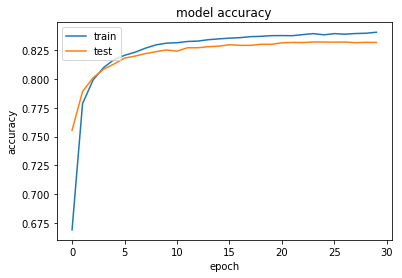

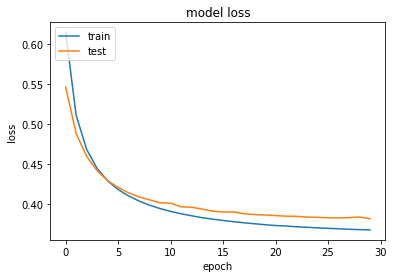

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 3.c Red con una capa oculta
Ahora, haremos nuevamente un modelo secuencial, al cual le agregarémos una capa oculta con activación ReLu. ¿Qué realiza la función ReLu (puede ejemplificar con gráficos)?

Entrene esta red nuevamente con los mismos parámetros que la red anterior. ¿Mejoran los desempeños? ¿Cuál es el número de parámetros de este modelo? Grafíque nuevamente como varía la métrica a medida pasan las _epochs_. ¿Alcanza a notar sobreajuste?

Cambie la función de activación por otra de su elección (e.g. $tanh$ o activación lineal). ¿Cambia el desempeño? 

Compare finalmente el desempeño con una regresión lineal. ¿Cómo hace la red para obtener representaciones no-lineales que la regresión lineal no puede obtener? ¿Por qué se podría argumentar que una red neuronal densa _feed forward_ tiene un sabor a ensamblado de regresiones lineales en un principio? 

Train on 25000 samples, validate on 25000 samples
Epoch 1/30
25000/25000 [==============================] - 2s 81us/step - loss: 0.6101 - acc: 0.6675 - val_loss: 0.5246 - val_acc: 0.7596
Epoch 2/30
25000/25000 [==============================] - 2s 75us/step - loss: 0.4741 - acc: 0.7860 - val_loss: 0.4455 - val_acc: 0.7966
Epoch 3/30
25000/25000 [==============================] - 2s 74us/step - loss: 0.4187 - acc: 0.8113 - val_loss: 0.4095 - val_acc: 0.8179
Epoch 4/30
25000/25000 [==============================] - 2s 74us/step - loss: 0.3956 - acc: 0.8251 - val_loss: 0.3962 - val_acc: 0.8240
Epoch 5/30
25000/25000 [==============================] - 2s 71us/step - loss: 0.3836 - acc: 0.8306 - val_loss: 0.3935 - val_acc: 0.8264
Epoch 6/30
25000/25000 [==============================] - 2s 74us/step - loss: 0.3765 - acc: 0.8334 - val_loss: 0.3843 - val_acc: 0.8302
Epoch 7/30
25000/25000 [==============================] - 2s 74us/step - loss: 0.3720 - acc: 0.8362 - val_loss: 0.3900 - val_acc

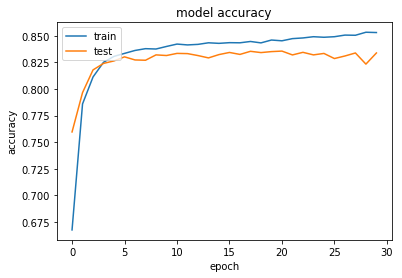

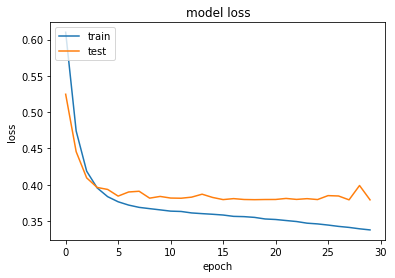

In [0]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile('sgd',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_tr,y_tr, epochs=30, validation_data=(x_val,y_val))
model.summary()

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

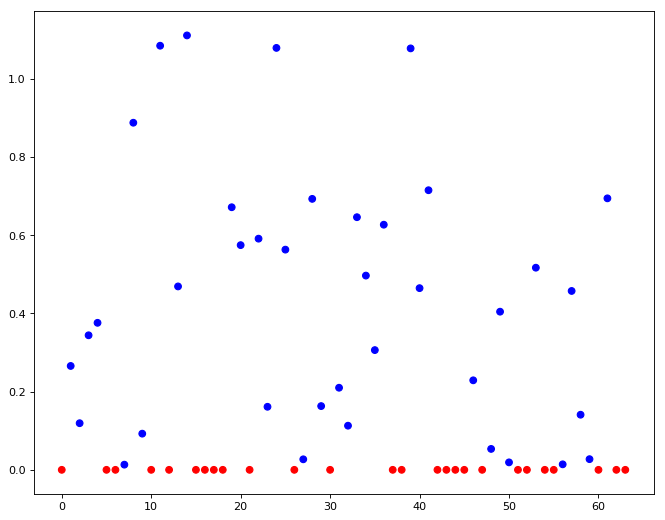

In [0]:
weights, biases = model.layers[0].get_weights()
layer_1 = (np.dot(weights.T,x_val[0]))
relu = lambda t: np.maximum(t, 0)
vfunc = np.vectorize(relu)
out_layer_1 = vfunc(layer_1)
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
col = np.where(out_layer_1==0,'r','b')
plt.scatter(range(out_layer_1.size),out_layer_1, c=col)
plt.show()


##### ReLU

Con la función relu se crean valores ceros y elimina "neuronas"
 para algunas instancias, de acuerdo a los valores obtenidos en la primera capa y los features, el plot es un ejemplo de un review del test data y como con los pesos entrenados de la entrada y la función de activación serían los valores de la capa escondida. Siendo 0 los valores anulados en rojo y en azul el resto que si contarán, un ejemplo más gráfico sería:
 
<img src="https://miro.medium.com/max/513/1*dEi_IkVB7IpkzZ-6H0Vpsg.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 6px;" />

Train on 25000 samples, validate on 25000 samples
Epoch 1/30
25000/25000 [==============================] - 2s 97us/step - loss: 0.5783 - acc: 0.7006 - val_loss: 0.4956 - val_acc: 0.7731
Epoch 2/30
25000/25000 [==============================] - 2s 75us/step - loss: 0.4519 - acc: 0.7960 - val_loss: 0.4302 - val_acc: 0.8056
Epoch 3/30
25000/25000 [==============================] - 2s 77us/step - loss: 0.4083 - acc: 0.8182 - val_loss: 0.4034 - val_acc: 0.8188
Epoch 4/30
25000/25000 [==============================] - 2s 76us/step - loss: 0.3890 - acc: 0.8286 - val_loss: 0.3917 - val_acc: 0.8251
Epoch 5/30
25000/25000 [==============================] - 2s 80us/step - loss: 0.3788 - acc: 0.8328 - val_loss: 0.3849 - val_acc: 0.8277
Epoch 6/30
25000/25000 [==============================] - 2s 72us/step - loss: 0.3721 - acc: 0.8356 - val_loss: 0.3830 - val_acc: 0.8302
Epoch 7/30
25000/25000 [==============================] - 2s 72us/step - loss: 0.3688 - acc: 0.8373 - val_loss: 0.3799 - val_acc

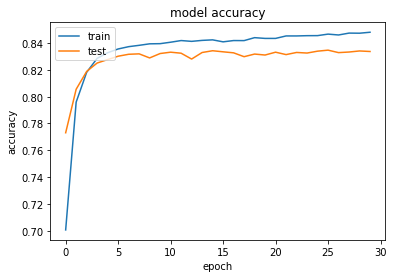

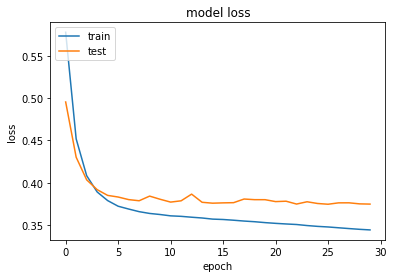

In [0]:
model = Sequential()
model.add(Dense(64, activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.compile('sgd',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_tr,y_tr, epochs=30, validation_data=(x_val,y_val))
model.summary()

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
reg = LinearRegression().fit(x_tr, y_tr)
print('lineal score: ', reg.score(x_val, y_val))

logreg = LogisticRegression().fit(x_tr, y_tr)
print('logística score: ',logreg.score(x_val, y_val))


lineal score:  0.452450332326889


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


logística score:  0.83444


##### Comparaciones
* No hay mayor diferencia entre las funciones de activación
* claramente la regresión lineal no serviría de buena manera debido a la complejidad de relaciones en la data, aunqu ṕor otra parte la regresión logística si logró un desempeño recalcable. 
* Las redes gracias a las funciones de activación logra obtener un mejor desempe{o, gracias a su naturaleza no lineal. 
* Se puede ver como ensamblado una red feed forward debido a que es la composición lineal, en la base de que solo se multiplica por pesos y se suma, de muchas regresiones lineales que bajo transformaciones con las funciones de activación logra trabajar bajo más complejidad dimensional.

* **Reflexión**, el buen desempeño de la logística en primera instancia fue un poco raro pero luego al pensar en la simplicidad de la representación se puede razonar su comportamiento parecido a la red, debido a que solo "cuenta características" la representación actual y no involucra ninguna relación entre palabras o contexto donde palabrás difieren en su significado, dejando una representación muy simple del lenguaje.

#### 3.d Exploración de número de neuronas ocultas

Utilizando la misma estructura de la red entrenada en la pregunta anterior, evalue como varía el _accuracy_ sobre validación y entrenamiento a medida se cambia el numero de neuronas. Explore numeros de neuronas en potencias de 2 entre 2 y 256. En cada iteración debe considerar el mejor _accuracy_ sobre validación y el _accuracy_ de entrenamiento de ese mísmo _epoch_, pues ese sería el modelo que se preferiría. 

Grafique como variaron los _accuracy_ a medida cambió el número de neuronas y discuta. 

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 2s 82us/step - loss: 0.6885 - acc: 0.5390 - val_loss: 0.6734 - val_acc: 0.5927
Epoch 2/15
25000/25000 [==============================] - 2s 65us/step - loss: 0.6354 - acc: 0.6772 - val_loss: 0.5924 - val_acc: 0.7275
Epoch 3/15
25000/25000 [==============================] - 2s 69us/step - loss: 0.5431 - acc: 0.7650 - val_loss: 0.5023 - val_acc: 0.7803
Epoch 4/15
25000/25000 [==============================] - 2s 71us/step - loss: 0.4606 - acc: 0.8032 - val_loss: 0.4365 - val_acc: 0.8058
Epoch 5/15
25000/25000 [==============================] - 2s 71us/step - loss: 0.4148 - acc: 0.8188 - val_loss: 0.4090 - val_acc: 0.8174
Epoch 6/15
25000/25000 [==============================] - 2s 69us/step - loss: 0.3942 - acc: 0.8276 - val_loss: 0.3969 - val_acc: 0.8243
Epoch 7/15
25000/25000 [==============================] - 2s 68us/step - loss: 0.3831 - acc: 0.8328 - val_loss: 0.3898 - val_acc

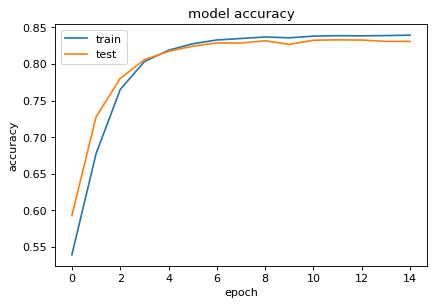

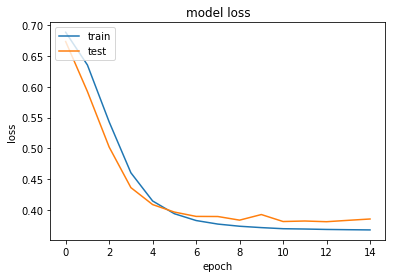

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 2s 79us/step - loss: 0.6650 - acc: 0.6038 - val_loss: 0.6173 - val_acc: 0.6895
Epoch 2/15
25000/25000 [==============================] - 2s 68us/step - loss: 0.5473 - acc: 0.7403 - val_loss: 0.4868 - val_acc: 0.7773
Epoch 3/15
25000/25000 [==============================] - 2s 68us/step - loss: 0.4494 - acc: 0.7976 - val_loss: 0.4290 - val_acc: 0.8064
Epoch 4/15
25000/25000 [==============================] - 2s 71us/step - loss: 0.4095 - acc: 0.8194 - val_loss: 0.4050 - val_acc: 0.8198
Epoch 5/15
25000/25000 [==============================] - 2s 70us/step - loss: 0.3917 - acc: 0.8269 - val_loss: 0.3941 - val_acc: 0.8252
Epoch 6/15
25000/25000 [==============================] - 2s 70us/step - loss: 0.3816 - acc: 0.8336 - val_loss: 0.3875 - val_acc: 0.8290
Epoch 7/15
25000/25000 [==============================] - 2s 71us/step - loss: 0.3761 - acc: 0.8338 - val_loss: 0.3850 - val_acc

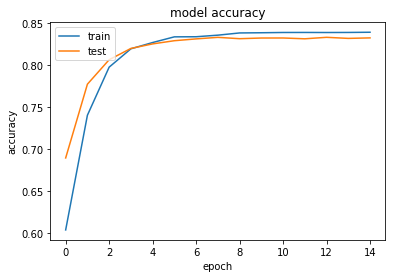

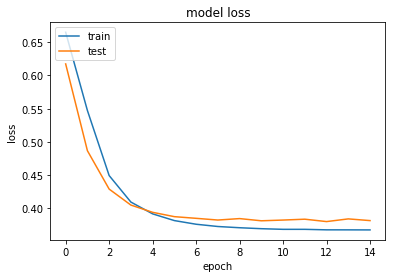

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 2s 78us/step - loss: 0.6052 - acc: 0.6710 - val_loss: 0.5179 - val_acc: 0.7576
Epoch 2/15
25000/25000 [==============================] - 2s 67us/step - loss: 0.4669 - acc: 0.7863 - val_loss: 0.4406 - val_acc: 0.8025
Epoch 3/15
25000/25000 [==============================] - 2s 67us/step - loss: 0.4164 - acc: 0.8152 - val_loss: 0.4104 - val_acc: 0.8179
Epoch 4/15
25000/25000 [==============================] - 2s 68us/step - loss: 0.3945 - acc: 0.8279 - val_loss: 0.3971 - val_acc: 0.8254
Epoch 5/15
25000/25000 [==============================] - 2s 67us/step - loss: 0.3830 - acc: 0.8331 - val_loss: 0.3969 - val_acc: 0.8251
Epoch 6/15
25000/25000 [==============================] - 2s 68us/step - loss: 0.3770 - acc: 0.8349 - val_loss: 0.3865 - val_acc: 0.8306
Epoch 7/15
25000/25000 [==============================] - 2s 70us/step - loss: 0.3726 - acc: 0.8365 - val_loss: 0.3841 - val_acc

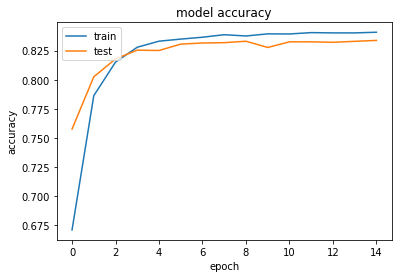

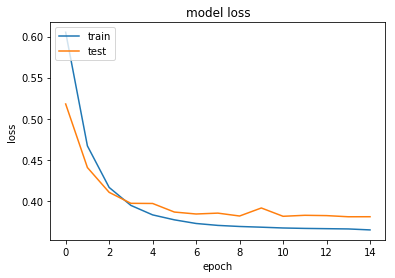

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 2s 82us/step - loss: 0.6038 - acc: 0.6746 - val_loss: 0.5186 - val_acc: 0.7570
Epoch 2/15
25000/25000 [==============================] - 2s 70us/step - loss: 0.4652 - acc: 0.7889 - val_loss: 0.4402 - val_acc: 0.8032
Epoch 3/15
25000/25000 [==============================] - 2s 69us/step - loss: 0.4147 - acc: 0.8153 - val_loss: 0.4114 - val_acc: 0.8187
Epoch 4/15
25000/25000 [==============================] - 2s 69us/step - loss: 0.3934 - acc: 0.8263 - val_loss: 0.3988 - val_acc: 0.8228
Epoch 5/15
25000/25000 [==============================] - 2s 69us/step - loss: 0.3822 - acc: 0.8310 - val_loss: 0.4016 - val_acc: 0.8220
Epoch 6/15
25000/25000 [==============================] - 2s 74us/step - loss: 0.3760 - acc: 0.8349 - val_loss: 0.3879 - val_acc: 0.8299
Epoch 7/15
25000/25000 [==============================] - 2s 69us/step - loss: 0.3721 - acc: 0.8364 - val_loss: 0.3847 - val_acc

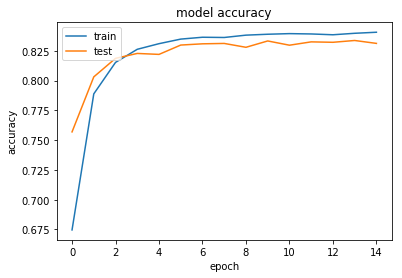

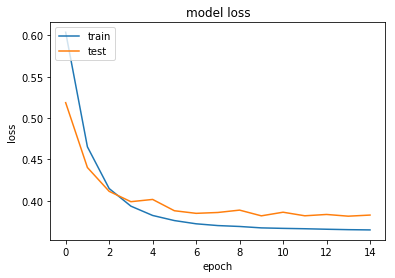

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 2s 86us/step - loss: 0.6160 - acc: 0.6587 - val_loss: 0.5289 - val_acc: 0.7544
Epoch 2/15
25000/25000 [==============================] - 2s 73us/step - loss: 0.4750 - acc: 0.7850 - val_loss: 0.4616 - val_acc: 0.7864
Epoch 3/15
25000/25000 [==============================] - 2s 73us/step - loss: 0.4196 - acc: 0.8150 - val_loss: 0.4115 - val_acc: 0.8173
Epoch 4/15
25000/25000 [==============================] - 2s 73us/step - loss: 0.3962 - acc: 0.8245 - val_loss: 0.3974 - val_acc: 0.8248
Epoch 5/15
25000/25000 [==============================] - 2s 74us/step - loss: 0.3842 - acc: 0.8310 - val_loss: 0.3955 - val_acc: 0.8248
Epoch 6/15
25000/25000 [==============================] - 2s 71us/step - loss: 0.3767 - acc: 0.8338 - val_loss: 0.3911 - val_acc: 0.8270
Epoch 7/15
25000/25000 [==============================] - 2s 72us/step - loss: 0.3720 - acc: 0.8367 - val_loss: 0.3847 - val_acc

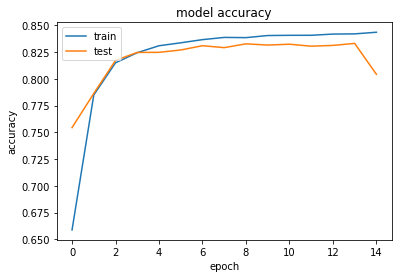

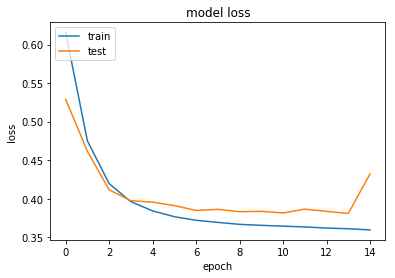

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 2s 98us/step - loss: 0.6226 - acc: 0.6532 - val_loss: 0.5409 - val_acc: 0.7449
Epoch 2/15
25000/25000 [==============================] - 2s 78us/step - loss: 0.4829 - acc: 0.7807 - val_loss: 0.4460 - val_acc: 0.7990
Epoch 3/15
25000/25000 [==============================] - 2s 77us/step - loss: 0.4212 - acc: 0.8107 - val_loss: 0.4122 - val_acc: 0.8145
Epoch 4/15
25000/25000 [==============================] - 2s 76us/step - loss: 0.3962 - acc: 0.8253 - val_loss: 0.3975 - val_acc: 0.8247
Epoch 5/15
25000/25000 [==============================] - 2s 77us/step - loss: 0.3838 - acc: 0.8305 - val_loss: 0.3953 - val_acc: 0.8254
Epoch 6/15
25000/25000 [==============================] - 2s 78us/step - loss: 0.3771 - acc: 0.8347 - val_loss: 0.3858 - val_acc: 0.8309
Epoch 7/15
25000/25000 [==============================] - 2s 77us/step - loss: 0.3733 - acc: 0.8364 - val_loss: 0.3876 - val_acc

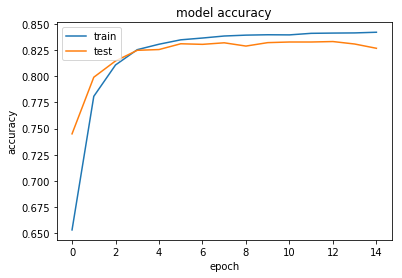

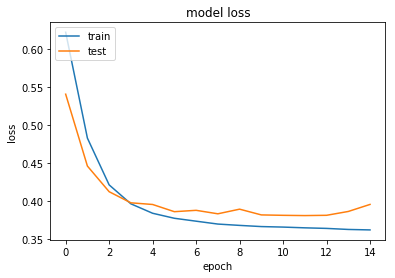

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 3s 108us/step - loss: 0.6026 - acc: 0.6876 - val_loss: 0.5239 - val_acc: 0.7562
Epoch 2/15
25000/25000 [==============================] - 2s 88us/step - loss: 0.4700 - acc: 0.7858 - val_loss: 0.4390 - val_acc: 0.8035
Epoch 3/15
25000/25000 [==============================] - 2s 84us/step - loss: 0.4179 - acc: 0.8115 - val_loss: 0.4112 - val_acc: 0.8165
Epoch 4/15
25000/25000 [==============================] - 2s 83us/step - loss: 0.3949 - acc: 0.8247 - val_loss: 0.4034 - val_acc: 0.8186
Epoch 5/15
25000/25000 [==============================] - 2s 84us/step - loss: 0.3830 - acc: 0.8312 - val_loss: 0.3897 - val_acc: 0.8276
Epoch 6/15
25000/25000 [==============================] - 2s 86us/step - loss: 0.3756 - acc: 0.8352 - val_loss: 0.3851 - val_acc: 0.8299
Epoch 7/15
25000/25000 [==============================] - 2s 84us/step - loss: 0.3705 - acc: 0.8377 - val_loss: 0.3869 - val_ac

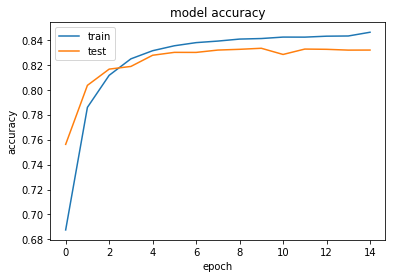

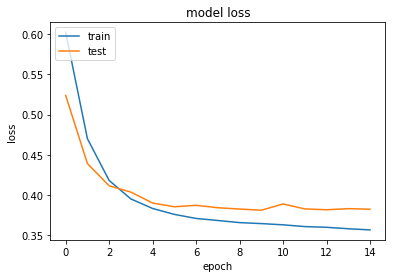

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 4s 149us/step - loss: 0.5993 - acc: 0.6870 - val_loss: 0.5149 - val_acc: 0.7690
Epoch 2/15
25000/25000 [==============================] - 3s 127us/step - loss: 0.4636 - acc: 0.7927 - val_loss: 0.4355 - val_acc: 0.8059
Epoch 3/15
25000/25000 [==============================] - 3s 129us/step - loss: 0.4130 - acc: 0.8173 - val_loss: 0.4083 - val_acc: 0.8186
Epoch 4/15
25000/25000 [==============================] - 3s 125us/step - loss: 0.3918 - acc: 0.8265 - val_loss: 0.4011 - val_acc: 0.8218
Epoch 5/15
25000/25000 [==============================] - 3s 127us/step - loss: 0.3803 - acc: 0.8311 - val_loss: 0.3888 - val_acc: 0.8292
Epoch 6/15
25000/25000 [==============================] - 3s 129us/step - loss: 0.3733 - acc: 0.8343 - val_loss: 0.3854 - val_acc: 0.8305
Epoch 7/15
25000/25000 [==============================] - 3s 136us/step - loss: 0.3689 - acc: 0.8364 - val_loss: 0.3846 - 

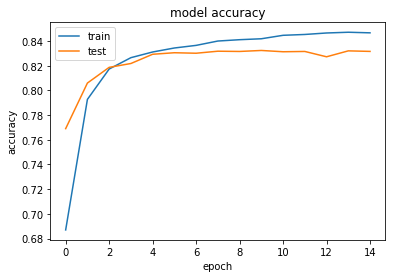

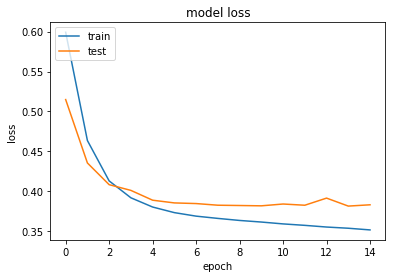

In [0]:
plt.figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
for i in range(1,9):
  model = Sequential()
  model.add(Dense(units=2**i, activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile('sgd',loss='binary_crossentropy',metrics=['accuracy'])
  history = model.fit(x_tr,y_tr, epochs=15, validation_data=(x_val,y_val))
  model.summary()
  
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
    

#### 3.e Pesos de la red

Obtenga los pesos de la red entrenada a completitud anteriormente usando el método `.get_weights` y grafíque un historgrama. Note que para cada capa se obtienen por separado los pesos de los datos y del intercepto. Así en el índice 0 obtenemos los pesos de los datos de entrada, en el 1 los pesos del intercepto de entrada, en el 2 los pesos de la capa oculta y en el 3 los pesos del intercepto de la capa oculta. Solo se requiere graficar el primero.

Compare luego ese histograma con el obtenido al graficar los pesos de una red sin entrenar, como muestra el código. Discuta lo que observa. 

<function matplotlib.pyplot.show>

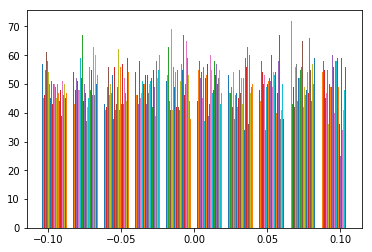

In [0]:
untrained = Sequential()
untrained.add(Dense(32, activation='relu'))
untrained.add(Dense(1,activation='sigmoid'))
untrained.compile(SGD(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
untrained.fit(x_tr,y_tr,epochs=0)  # the easy way to create the weights without training, though there are more purists ways

plt.hist(untrained.get_weights()[0])
plt.show 
# . . . 

In [0]:
untrained.fit(x_tr,y_tr, epochs=15, validation_data=(x_val,y_val))  

<function matplotlib.pyplot.show>

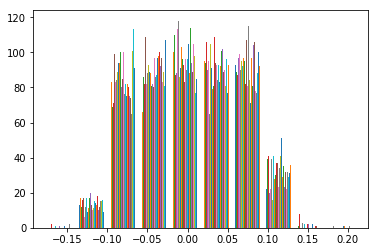

In [0]:
plt.hist(untrained.get_weights()[0])
plt.show 

#### 3.f Extreme learning Machine **(Opcional)**
En esta pregunta implementaremos una _extreme learning machine_ o ELM. Este modelo puede asimilarse a una red neuronal como la entrenada anteriormente pero donde los pesos que conectan al _input_ y la capa oculta no son entrenables. Podemos realizar esto manualmente en algunos casos o utilizando igualmente keras como muestra el código. 
Entrene una ELM y compare los tiempos de entrenamiento y desempeños obtenidos para redes con el mismo número de neuronas. Compare tambien el número de parámetros entrenables respecto redes densas del mismo tamaño. 

Pruebe un par de tamaños de red distintos, considerando la cantidad de parámetros libres de los modelos en cuestión y comente. 

<function matplotlib.pyplot.show>

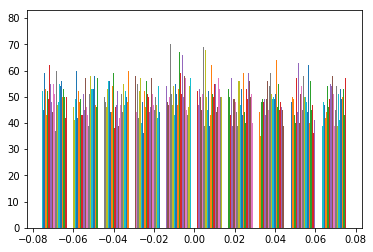

In [0]:
ELM = Sequential()
ELM.add(Dense(512, activation='relu',trainable=False))
ELM.add(Dense(1,activation='sigmoid'))
ELM.compile(SGD(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

ELM.fit(x_tr,y_tr,epochs=0)  # the easy way to create the weights without training, though there are more purists ways

plt.hist(ELM.get_weights()[0])
plt.show 

Train on 25000 samples, validate on 25000 samples
Epoch 1/30
25000/25000 [==============================] - 3s 105us/step - loss: 0.7112 - acc: 0.4836 - val_loss: 0.7045 - val_acc: 0.4933
Epoch 2/30
25000/25000 [==============================] - 2s 99us/step - loss: 0.6998 - acc: 0.5102 - val_loss: 0.6947 - val_acc: 0.5207
Epoch 3/30
25000/25000 [==============================] - 2s 99us/step - loss: 0.6901 - acc: 0.5379 - val_loss: 0.6857 - val_acc: 0.5450
Epoch 4/30
25000/25000 [==============================] - 3s 101us/step - loss: 0.6813 - acc: 0.5659 - val_loss: 0.6773 - val_acc: 0.5701
Epoch 5/30
25000/25000 [==============================] - 2s 97us/step - loss: 0.6729 - acc: 0.5884 - val_loss: 0.6695 - val_acc: 0.5906
Epoch 6/30
25000/25000 [==============================] - 2s 95us/step - loss: 0.6653 - acc: 0.6083 - val_loss: 0.6622 - val_acc: 0.6123
Epoch 7/30
25000/25000 [==============================] - 2s 98us/step - loss: 0.6581 - acc: 0.6259 - val_loss: 0.6555 - val_a

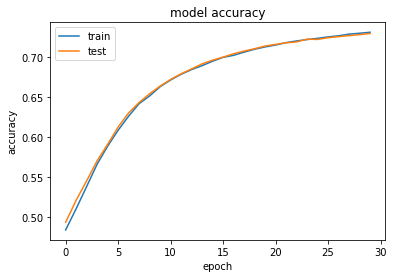

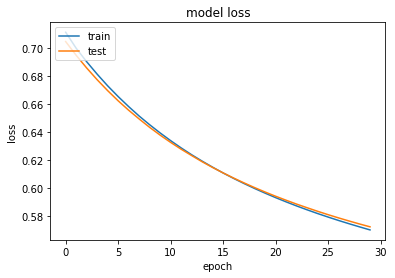

In [0]:
history = ELM.fit(x_tr,y_tr, epochs=30, validation_data=(x_val,y_val))
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 3.g Autoencoders  **(Opcional)**
Otra aproximación muy ingeniosa para mejorar el desempeño de algunos modelos es el uso de _autoenconders_. Comente brevemente sobre qué realizar un _autoencoder_ y sobre por qué no necesita conocer el target para entrenarse.

Esta característica de los _autoencoders_ han permitido mejorar drásticamente muchas aplicaciones reales donde se tienen enormes cantidades de datos sin _target_ y menos datos ya etiquetados (por ejemplo, en reconocimiento de imagenes google tiene acceso a una cantidad en la práctica ilimitada de fotos de sus usuarios pero muy pocas fotos "etiquetadas" en comparación), aprendiendo representaciones relevantes de los datos y luego transfiriendo ese conocimiento. En esta pregunta utilizaremos un autoencoder para tratar de mejorar el desempeño de la red neuronal densa. 

Para esto primero entrenaremos una red neuronal densa que tiene como _input_ y _target_ nuestros `x_tr`. Una vez entrenada esa red, extraeremos sus pesos de la capa escondida para obtener nuestra capa _encoder_ y nuestra capa _decoder_. Finalmente, utilizaremos nuestra capa de _encoding_ como la primera capa de un nuevo modelo (más pequeño), el cual luego entrenaremos sin modificar los pesos de la capa _encoding_.

Note que este procedimiento también puede hacerse como un preprocesamiento de los datos, sin embargo les propongo esta manera pues pone en evidencia el proceso de _transfer learning_ que comentabamos anteriormente. 

##### Descripción 
Es una red que entrena con input y output iguales de tal manera de encontrar una caracterización con menos o más variables. Luego se obtiene el encoder y decoder de sus respectivas capas. 

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 6s 258us/step - loss: 1.3302 - acc: 0.7781 - val_loss: 1.1818 - val_acc: 0.7664
Epoch 2/15
25000/25000 [==============================] - 6s 245us/step - loss: 1.1787 - acc: 0.7630 - val_loss: 1.2409 - val_acc: 0.7265
Epoch 3/15
25000/25000 [==============================] - 6s 254us/step - loss: 1.1695 - acc: 0.7445 - val_loss: 1.1737 - val_acc: 0.7529
Epoch 4/15
25000/25000 [==============================] - 7s 268us/step - loss: 1.1672 - acc: 0.7537 - val_loss: 1.1284 - val_acc: 0.7614
Epoch 5/15
25000/25000 [==============================] - 6s 253us/step - loss: 1.1192 - acc: 0.7648 - val_loss: 1.1089 - val_acc: 0.7715
Epoch 6/15
25000/25000 [==============================] - 6s 240us/step - loss: 1.0953 - acc: 0.7704 - val_loss: 1.0651 - val_acc: 0.7768
Epoch 7/15
25000/25000 [==============================] - 6s 235us/step - loss: 1.0587 - acc: 0.7789 - val_loss: 1.0743 - 

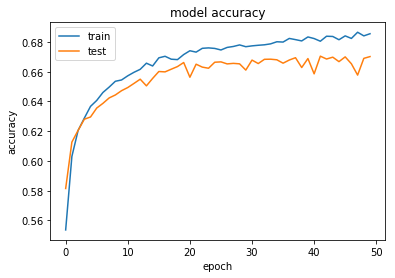

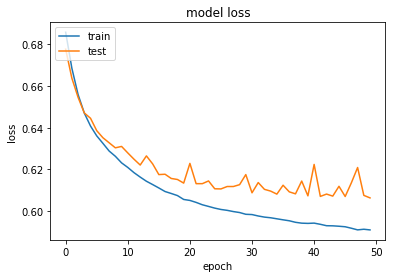

In [0]:
autoencoder = Sequential()
autoencoder.add(Dense(256, activation='relu')) # you can change the number of units
autoencoder.add(Dense(x_tr.shape[1]))
# compile with binary_crossentropy and fit (if the representation wasn't binary it might be a better idea to use mse)
autoencoder.compile(SGD(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history = autoencoder.fit(x_tr,x_tr, epochs=15, validation_data=(x_val,x_val))
    
# get the layers
encoder = autoencoder.layers[0]
decoder = autoencoder.layers[1]

#create the new model
model = Sequential()
model.add(encoder)
model.layers[0].trainable = False  # we dont want to train the encoder
# add the hidden and output layers
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# compile and fit
model.compile('sgd',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_tr,y_tr, epochs=50, validation_data=(x_val,y_val))
model.summary()

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 25000 samples, validate on 25000 samples
Epoch 1/30
25000/25000 [==============================] - 5s 194us/step - loss: 1.1999 - acc: 0.8197 - val_loss: 0.9963 - val_acc: 0.8141
Epoch 2/30
25000/25000 [==============================] - 5s 196us/step - loss: 0.9377 - acc: 0.8095 - val_loss: 0.8476 - val_acc: 0.8151
Epoch 3/30
25000/25000 [==============================] - 4s 171us/step - loss: 0.8126 - acc: 0.8160 - val_loss: 0.7610 - val_acc: 0.8218
Epoch 4/30
25000/25000 [==============================] - 5s 181us/step - loss: 0.9192 - acc: 0.7734 - val_loss: 0.8791 - val_acc: 0.7754
Epoch 5/30
25000/25000 [==============================] - 5s 182us/step - loss: 0.8917 - acc: 0.7692 - val_loss: 0.9993 - val_acc: 0.7432
Epoch 6/30
25000/25000 [==============================] - 5s 181us/step - loss: 0.9362 - acc: 0.7584 - val_loss: 0.8839 - val_acc: 0.7763
Epoch 7/30
25000/25000 [==============================] - 4s 177us/step - loss: 0.8693 - acc: 0.7798 - val_loss: 0.8616 - 

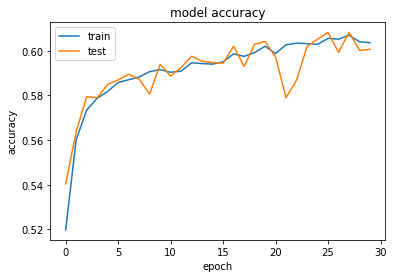

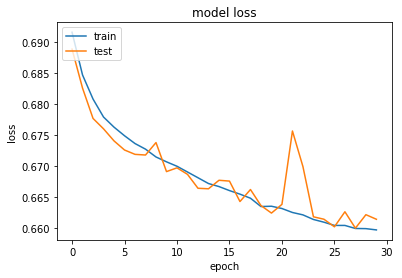

In [0]:
autoencoder = Sequential()
autoencoder.add(Dense(128, activation='relu')) # you can change the number of units
autoencoder.add(Dense(x_tr.shape[1]))
# compile with binary_crossentropy and fit (if the representation wasn't binary it might be a better idea to use mse)
autoencoder.compile(SGD(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history = autoencoder.fit(x_tr,x_tr, epochs=30, validation_data=(x_val,x_val))
    
# get the layers
encoder = autoencoder.layers[0]
decoder = autoencoder.layers[1]

#create the new model
model = Sequential()
model.add(encoder)
model.layers[0].trainable = False  # we dont want to train the encoder
# add the hidden and output layers
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# compile and fit
model.compile('sgd',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_tr,y_tr, epochs=30, validation_data=(x_val,y_val))
model.summary()

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 25000 samples, validate on 25000 samples
Epoch 1/30
25000/25000 [==============================] - 4s 156us/step - loss: 1.2777 - acc: 0.8181 - val_loss: 1.0555 - val_acc: 0.8073
Epoch 2/30
25000/25000 [==============================] - 3s 140us/step - loss: 0.9727 - acc: 0.8092 - val_loss: 0.9093 - val_acc: 0.8142
Epoch 3/30
25000/25000 [==============================] - 4s 140us/step - loss: 0.9076 - acc: 0.8126 - val_loss: 0.8792 - val_acc: 0.8133
Epoch 4/30
25000/25000 [==============================] - 4s 141us/step - loss: 0.8191 - acc: 0.8209 - val_loss: 0.7730 - val_acc: 0.8312
Epoch 5/30
25000/25000 [==============================] - 4s 143us/step - loss: 0.7492 - acc: 0.8327 - val_loss: 0.7191 - val_acc: 0.8385
Epoch 6/30
25000/25000 [==============================] - 3s 140us/step - loss: 0.7088 - acc: 0.8393 - val_loss: 0.6847 - val_acc: 0.8446
Epoch 7/30
25000/25000 [==============================] - 4s 141us/step - loss: 0.6770 - acc: 0.8444 - val_loss: 0.6529 - 

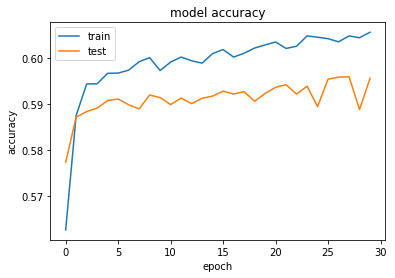

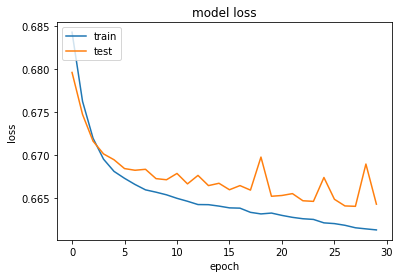

In [0]:
autoencoder = Sequential()
autoencoder.add(Dense(64, activation='relu')) # you can change the number of units
autoencoder.add(Dense(x_tr.shape[1]))
# compile with binary_crossentropy and fit (if the representation wasn't binary it might be a better idea to use mse)
autoencoder.compile(SGD(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history = autoencoder.fit(x_tr,x_tr, epochs=30, validation_data=(x_val,x_val))
    
# get the layers
encoder = autoencoder.layers[0]
decoder = autoencoder.layers[1]

#create the new model
model = Sequential()
model.add(encoder)
model.layers[0].trainable = False  # we dont want to train the encoder
# add the hidden and output layers
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# compile and fit
model.compile('sgd',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_tr,y_tr, epochs=30, validation_data=(x_val,y_val))
model.summary()

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

¿Cuál es el factor de compresión (la representación que induce el autoencoder frente a la representación original)? ¿Cómo considera los resultados tomando en cuenta que en la practica el nuevo modelo aprende con muchos menos atributos, si bien estos atributos fueron entrenados por otro modelo? 

#### 3.h Bagging **(Opcional)**

Crearemos ahora un ensamblado utilizando la técnica de _Bagging_, ensamblando las predicciones de distintos árboles para predecir el resultado. 

Explique brevemente el procedimiento realizado por _Bagging_, en particular por qué los distintos arboles no se entrenan idénticamente y el significado de los parámetros que aparecen en el código. 

##### Descripción
* **base_estimaro** define el estimador a ajustar con los subconjuntos aleatorios del dataset.
* **n_estimatos** es la cantidad de estimadores base en el ensamblado
* **max_samples** número de ejemplos sacados de X para cada estimador
* **max_features** número de características de X para cada estimador

En los *max_algo* pueden ser enteros o si son flotantes es equivalente a flotante*X.shape[0]

In [0]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                        n_estimators=100,
                        max_samples=0.5,
                        max_features=0.7
                       )
# fit and compare 
history = bag.fit(x_tr,y_tr)

In [0]:
bag.score(x_val,y_val)

0.6554

#### 3.i AdaBoost
_Adaptative Boosting_ o AdaBoost es otro meta-algoritmo que crea ensamblados a partir de modelos más simple. Entrene un modelo de AdaBoost con estimador "pequeño", por ejemplo puede usar un arbol, una regresión lineal u otros modelos de `sklearn` y un límite de estimadores (`n_estimators`) de a lo menos 200. 

Calcule su _accuracy_ y comparelo con los demás métodos. 

##### Descripción
* Por defecto ocupa como estimador un árbol de decisión de profundidad 1
* **n_estimators** es el número máximo de estimadores para terminar, puede parar tempranamente si se llega a un ajuste perfecto.
* **random_state** es la semilla usada para los generadores aleatorios.

In [0]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=250, random_state=0)
clf.fit(x_tr, y_tr)
clf.score(x_val, y_val)  

0.82788

Discuta sobre el modelo que encontró el mejor `accuracy`. ¿Por qué cree que esta representación le acomoda a la red neuronal y no a los arboles de desición? 